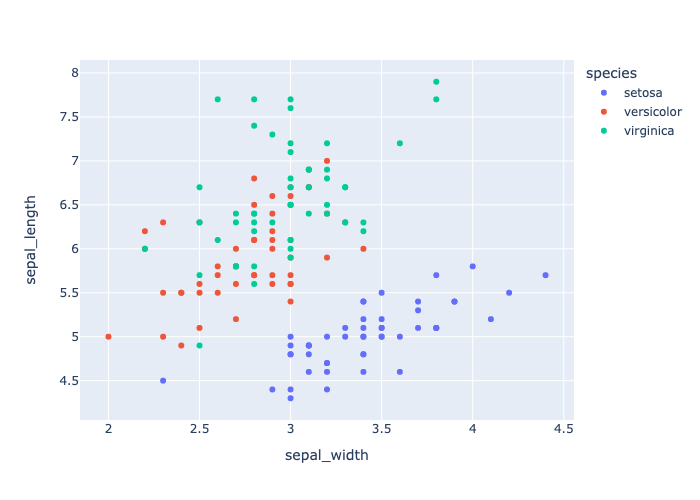

In [4]:
import plotly.express as px
fig = px.scatter(px.data.iris(), x="sepal_width", y="sepal_length", color="species")
fig.show("png")

In [6]:
import pandas as pd 
PCAWG_wgs_mut = pd.read_csv('../project_data/catalogs/WGS/WGS_PCAWG.96.csv')
PCAWG_wgs_act = pd.read_csv('../project_data/activities/WGS/WGS_PCAWG.activities.csv')

nonPCAWG_wgs_act = pd.read_csv('../project_data/activities/WGS/WGS_Other.activities.csv')
nonPCAWG_wgs_mut = pd.read_csv('../project_data/catalogs/WGS/WGS_Other.96.csv')

PCAWG_wgs_mut = PCAWG_wgs_mut.set_index (PCAWG_wgs_mut['Mutation type'] + "_" + PCAWG_wgs_mut['Trinucleotide'])
PCAWG_wgs_mut.drop(['Mutation type', 'Trinucleotide'], axis=1, inplace=True)
df_wgs_mut = PCAWG_wgs_mut.T

# 2. 
row_sums = df_wgs_mut.sum(axis=1)
df_wgs_mut["Mutation Count"] = row_sums 
# 3.
df_wgs_mut['Cancer Type'] = df_wgs_mut.index.str.split("::").str[0]
df_wgs_mut["Type"] = df_wgs_mut.index.str.split("::").str[0].str.split("-").str[1]
df_wgs_mut["Tissue"] = df_wgs_mut.index.str.split("-").str[0]

# do the same to the nonPCAWG_wgs_mut
# 1.
nonPCAWG_wgs_mut = nonPCAWG_wgs_mut.set_index (nonPCAWG_wgs_mut['Mutation type'] + "_" + nonPCAWG_wgs_mut['Trinucleotide'])
nonPCAWG_wgs_mut.drop(['Mutation type', 'Trinucleotide'], axis=1, inplace=True)
df_non_wgs_mut = nonPCAWG_wgs_mut.T

# 2.
row_sums = df_non_wgs_mut.sum(axis=1)
df_non_wgs_mut["Mutation Count"] = row_sums
# 3.
df_non_wgs_mut['Cancer Type'] = df_non_wgs_mut.index.str.split("::").str[0]
# to 
df_non_wgs_mut['Cancer Type'] = df_non_wgs_mut['Cancer Type'].replace({
    'Breast-cancer': 'Breast-AdenoCA',
    'AML': 'Myeloid-AML',
    'Eso-AdenoCa': 'Eso-AdenoCA',
    'ALL' : 'Lymph-ALL',
    'Ewings': 'Bone-Ewings',
    'Sarcoma-bone': 'Bone-Sarcoma',
    'Biliary-AdenoCa': 'Biliary-AdenoCA',
    'Ovary-AdenoCa': 'Ovary-AdenoCA',
    'Lung-AdenoCa': 'Lung-AdenoCA',
    'ColoRect-AdenoCa': 'ColoRect-AdenoCA',
    'Panc-AdenoCa' : 'Panc-AdenoCA',
    'Stomach-AdenoCa': 'Stomach-AdenoCA',
    'Prost-AdenoCa': 'Prost-AdenoCA',
    
})

df_non_wgs_mut["Tissue"] = df_non_wgs_mut['Cancer Type'].apply(lambda x: x.split('-')[0] if '-' in x else x)
df_non_wgs_mut["Type"] = df_non_wgs_mut['Cancer Type'].apply(lambda x: x.split('-')[1] if '-' in x else x)

In [7]:
# Preprocessing the activities
color_palette = px.colors.qualitative.Plotly
df_wgs_act = PCAWG_wgs_act.copy()
df_wgs_act = df_wgs_act.rename(columns={"Cancer Types": "Cancer Type", "Sample Names": "Sample Name"})
# 1.
df_wgs_act = df_wgs_act.set_index(df_wgs_act["Cancer Type"] + "::" + df_wgs_act["Sample Name"])
df_wgs_act.drop(['Accuracy', 'Sample Name'], axis=1, inplace=True)

# do the same to the nonPCAWG_wgs_act
df_non_wgs_act = nonPCAWG_wgs_act.copy()
df_non_wgs_act = df_non_wgs_act.rename(columns={"Cancer Types": "Cancer Type", "Sample Names": "Sample Name"})
# 1.
df_non_wgs_act = df_non_wgs_act.set_index(df_non_wgs_act["Cancer Type"] + "::" + df_non_wgs_act["Sample Name"])
df_non_wgs_act.drop(['Accuracy', 'Sample Name'], axis=1, inplace=True)




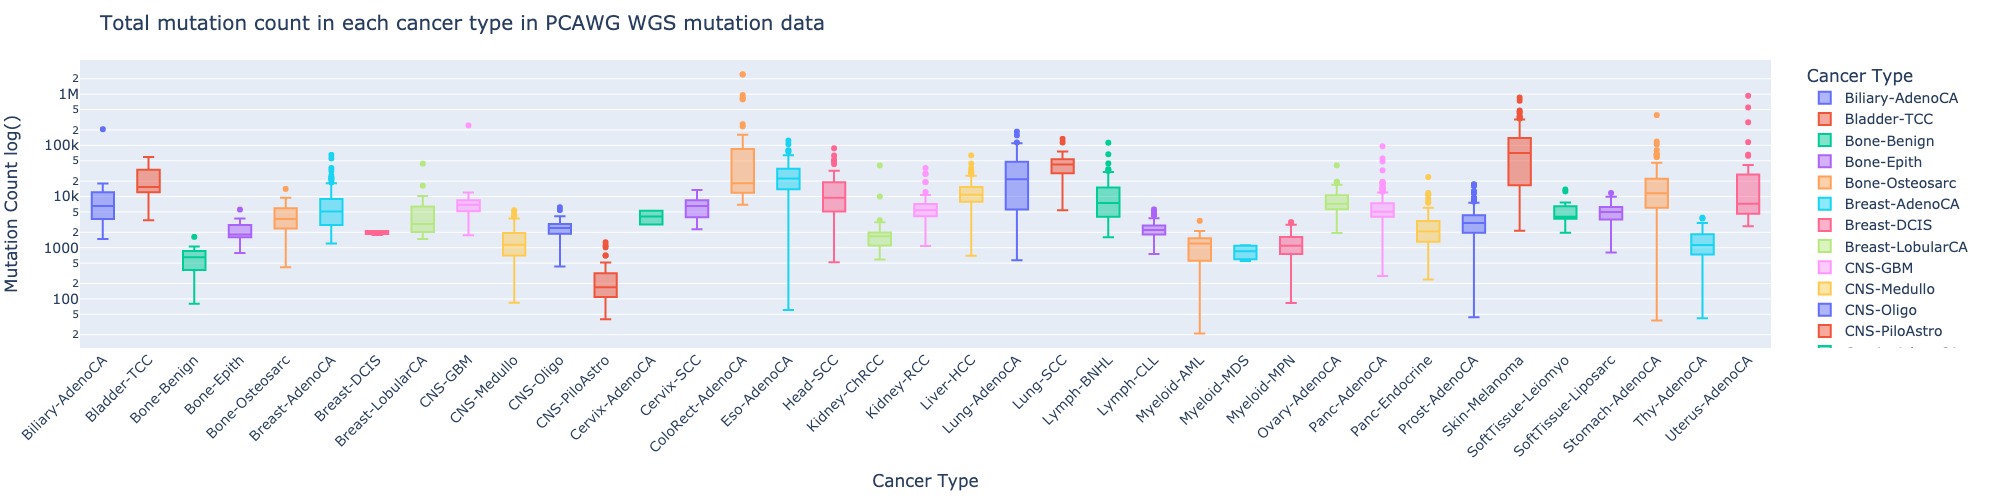

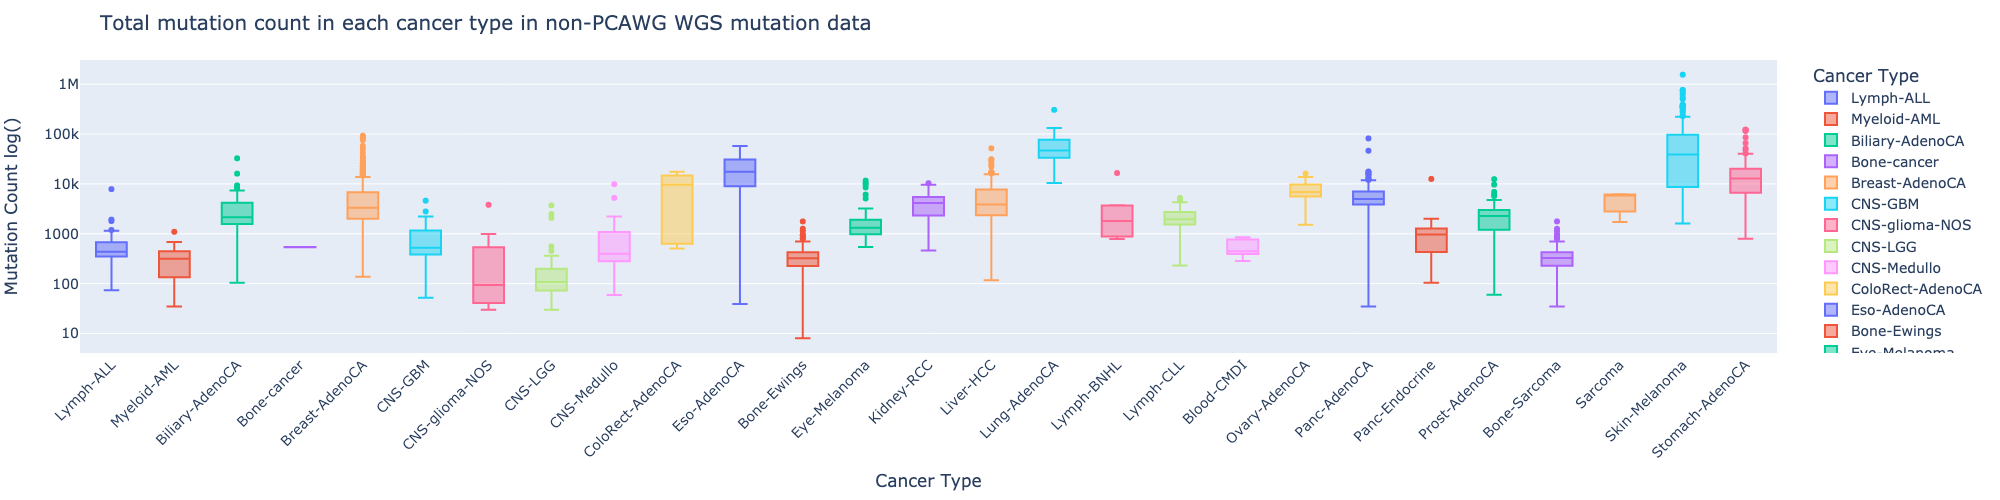

In [11]:
fig = px.box(df_wgs_mut, x="Cancer Type", y="Mutation Count", color="Cancer Type",
            color_discrete_sequence=color_palette, log_y=True)
fig.update_layout(
    title="Total mutation count in each cancer type in PCAWG WGS mutation data",
    titlefont_size = 20,
    xaxis_title="Cancer Type",
    yaxis_title="Mutation Count log()",
    font_size=14,
    width=2000,
)

fig.update_xaxes(tickangle=-45)
fig.show("png")

fig = px.box(df_non_wgs_mut, x="Cancer Type", y="Mutation Count", color="Cancer Type",
             color_discrete_sequence = color_palette ,log_y=True)
fig.update_layout(
    title="Total mutation count in each cancer type in non-PCAWG WGS mutation data",
    titlefont_size = 20,
    xaxis_title="Cancer Type",
    yaxis_title="Mutation Count log()",
    font_size=14,
    width=2000,
)

fig.update_xaxes(tickangle=-45)
fig.show("png")